In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib as mpl
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [3]:
data_frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
grouped_by_class = data_frame.groupby('class').agg({'class':['count']}).reset_index()
grouped_by_class.columns = ['class','total']

In [5]:
grouped_by_class['percentage'] = grouped_by_class['total']*100/len(data_frame)

# Funciones para mapear datos

In [6]:
def mapear_shapes(caracter):
  traduccion = {
      'b':'bell',
      'c':'conical',
      'x':'convex',
      'f':'flat',
      's':'shunken',
      'p':'spherical',
      'o':'others'
  }
  return traduccion[caracter]

In [7]:
def mapear_ring_type(caracter):
  traduccion = {
      'e':'evanescent',
      'c':'cobwebby',
      'r':'flaring',
      'g':'grooved',
      'l':'large',
      'p':'pendant',
      's':'sheathing',
      'z':'zone',
      'y':'scaly',
      'm':'movable',
      'f':'none',
      '?':'unknown',
  }
  return traduccion[caracter]

In [8]:
def mapear_class(caracter):
  traduccion = {
      'e':'edible',
      'p':'poisonous',
  }
  return traduccion[caracter]

In [9]:
def mapear_season(caracter):
  traduccion = {
      'a':'autumm',
      's':'spring',
      'u':'summer',
      'w':'winter',
  }
  return traduccion[caracter]

In [10]:
def mapear_surface(caracter):
  traduccion = {
      'i':'fibrous',
      'g':'grooves',
      'y':'scaly',
      's':'smooth',
      'h':'shiny',
      'l':'leathery',
      'k':'silky',
      't':'sticky',
      'w':'wrinkled',
      'e':'fleshy',
  }
  return traduccion[caracter]

In [11]:
def mapear_color(caracter):
  traduccion = {
      'n':'brown',
      'b':'buff',
      'g':'gray',
      'r':'green',
      'p':'pink',
      'u':'purple',
      'e':'red',
      'w':'white',
      'y':'yellow',
      'l':'blue',
      'o':'orange',
      'k':'black',
      'f':'none',
  }
  return traduccion[caracter]

In [12]:
def mapear_gill_atach(caracter):
  traduccion = {
      'a':'adnate',
      'x':'adnexed',
      'd':'decurrent',
      'e':'free',
      's':'sinuate',
      'p':'pores',
      'f':'none',
      '?':'unknown',
      
  }
  return traduccion[caracter]

In [13]:
def mapear_habitat(caracter):
  traduccion = {
      'h':'heaths',
      'u':'urban',
      'g':'grasses',
      'w':'waste',
      'l':'leaves',
      'p':'paths',
      'f':'none',
      '?':'unknown',
      'd':'woods',
      'm':'meadows',
      
  }
  return traduccion[caracter]

In [14]:
data_frame["cap-shape"] = data_frame["cap-shape"].map(mapear_shapes)
data_frame["class"] = data_frame["class"].map(mapear_class)
data_frame["season"] = data_frame["season"].map(mapear_season)
data_frame["cap-color"] = data_frame["cap-color"].map(mapear_color)
data_frame["gill-color"] = data_frame["gill-color"].map(mapear_color)
data_frame["habitat"] = data_frame["habitat"].map(mapear_habitat)

# Barplot

In [15]:
grouped_by_class = data_frame.groupby(["class", "cap-shape"]).agg({"cap-shape":["count"]})

In [16]:
grouped_by_class = grouped_by_class.reset_index()
grouped_by_class.columns = ["class","shape", "total"]

[Text(0.5, 1.0, 'amount of mushrooms by shape')]

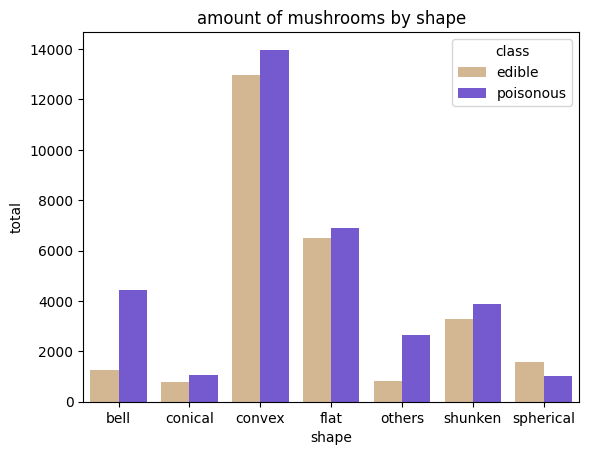

In [17]:
sns.barplot(data = grouped_by_class, x = 'shape', y = 'total' , hue = 'class', palette = {'edible':'BurlyWood', 'poisonous': '#6b45e3'} ).set(title='amount of mushrooms by shape')

# Heatmap

In [18]:
grouped_by_color = data_frame.groupby(['cap-color','gill-color','class']).agg({ 'class':['count'] })

In [19]:
grouped_by_color = grouped_by_color.unstack()

In [20]:
grouped_by_color = grouped_by_color.reset_index()
grouped_by_color.columns = ["outside_color", "inside_color", "edible", "poisonous"]

In [21]:
grouped_by_color = grouped_by_color.fillna(0)

In [22]:
grouped_by_color

,outside_color,inside_color,edible,poisonous
0,black,black,65.0,104.0
1,black,brown,0.0,98.0
2,black,buff,0.0,35.0
3,black,gray,95.0,37.0
4,black,none,0.0,176.0
...,...,...,...,...
103,yellow,pink,0.0,113.0
104,yellow,purple,39.0,0.0
105,yellow,red,0.0,138.0
106,yellow,white,1163.0,280.0


In [23]:
grouped_by_color["prob_poisonous"] = grouped_by_color["poisonous"]*100 / (grouped_by_color.edible + grouped_by_color.poisonous)

In [24]:
grouped_by_color

,outside_color,inside_color,edible,poisonous,prob_poisonous
0,black,black,65.0,104.0,61.538462
1,black,brown,0.0,98.0,100.000000
2,black,buff,0.0,35.0,100.000000
3,black,gray,95.0,37.0,28.030303
4,black,none,0.0,176.0,100.000000
...,...,...,...,...,...
103,yellow,pink,0.0,113.0,100.000000
104,yellow,purple,39.0,0.0,0.000000
105,yellow,red,0.0,138.0,100.000000
106,yellow,white,1163.0,280.0,19.404019


In [25]:
matrix = grouped_by_color.pivot_table(values = 'prob_poisonous', index = "inside_color", columns="outside_color").fillna(0)

Text(77.92222222222227, 0.5, 'color_gills')

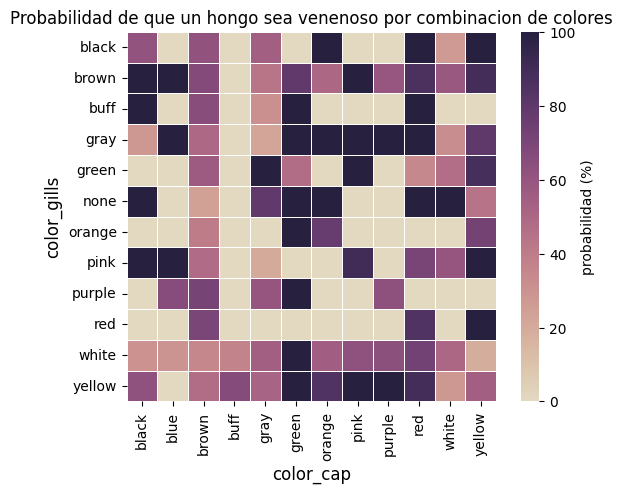

In [26]:
#sns.set(rc={'figure.figsize':(12.7,5.27)})

cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True )
ax = sns.heatmap(matrix,square=True,cmap=cmap, cbar_kws = {'label': 'probabilidad (%)'}, linewidth = .5) 
### Labels ###
plt.title("Probabilidad de que un hongo sea venenoso por combinacion de colores")
plt.xlabel('color_cap', fontsize = 12)
plt.ylabel('color_gills', fontsize = 12) 

# Boxplot

Text(0, 0.5, 'Altura del tallo')

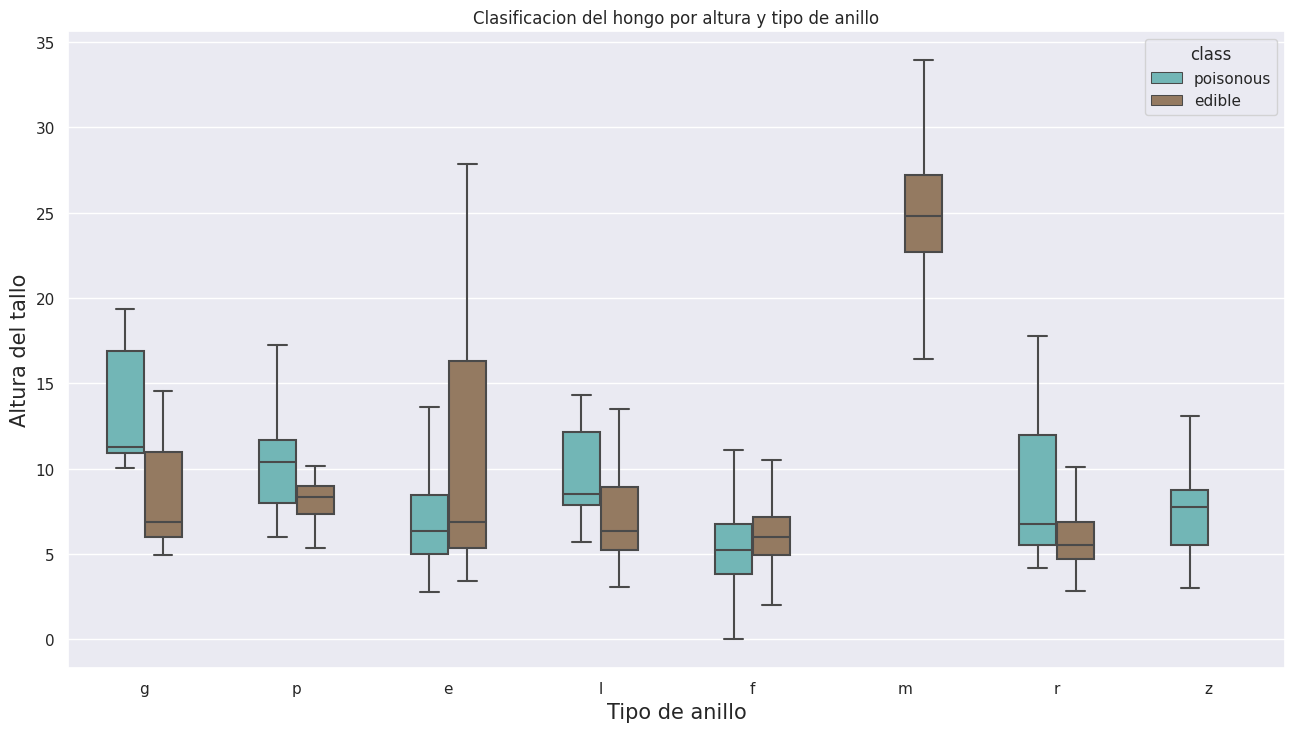

In [27]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(data = data_frame, x ='ring-type' , y='stem-height', hue = 'class',width=0.5,fliersize=False,palette=["#66c2c2", "#9c7a59"])

plt.title("Clasificacion del hongo por altura y tipo de anillo")
plt.xlabel('Tipo de anillo', fontsize = 15)
plt.ylabel('Altura del tallo', fontsize = 15) 

# Violinplot

Text(0.5, 1.0, 'Clasificacion del hongo por diametro de sombrero y color de velo')

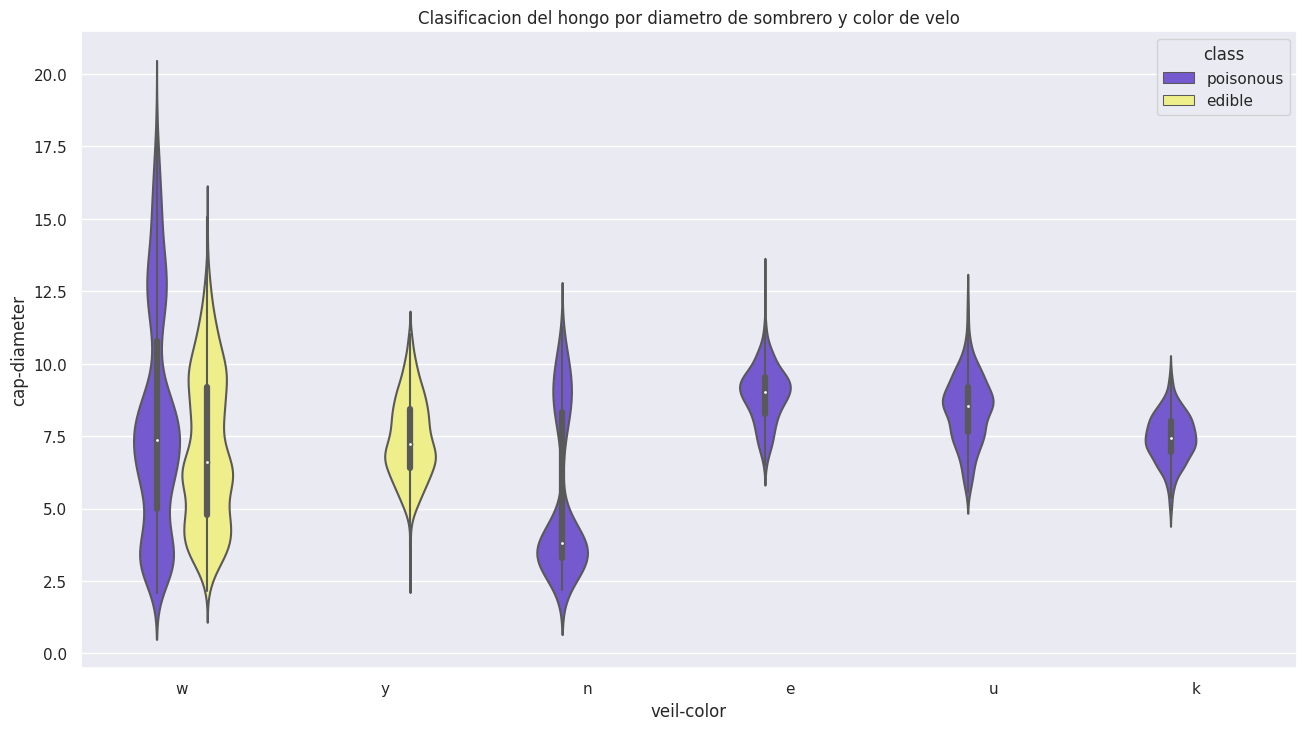

In [28]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.violinplot(data = data_frame, x ='veil-color' , y='cap-diameter', hue = 'class',width=0.5,fliersize=False,palette=["#6b45e3", "#ffff7a"])
plt.title("Clasificacion del hongo por diametro de sombrero y color de velo")

# Scatterplot


Text(0.5, 1.0, 'Clasificacion del hongo por diametro de sombrero y altura del tallo')

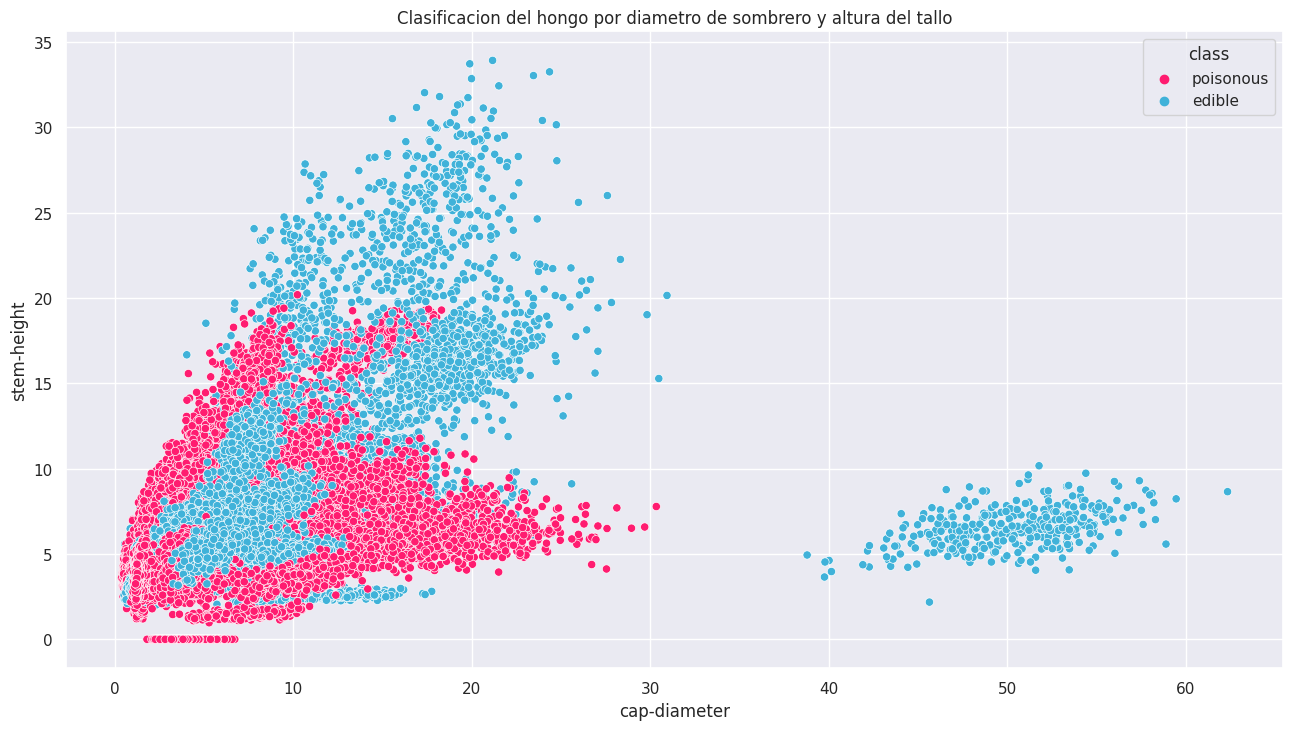

In [29]:
sns.scatterplot(data=data_frame , x="cap-diameter", y="stem-height", hue = "class",  palette = {'edible':'#40b2d9', 'poisonous': '#ff1c70'} )
plt.title("Clasificacion del hongo por diametro de sombrero y altura del tallo")

# Otros plots

Text(0.5, 1.0, 'Clasificacion del hongo por diametro de sombrero y anchura del tallo')

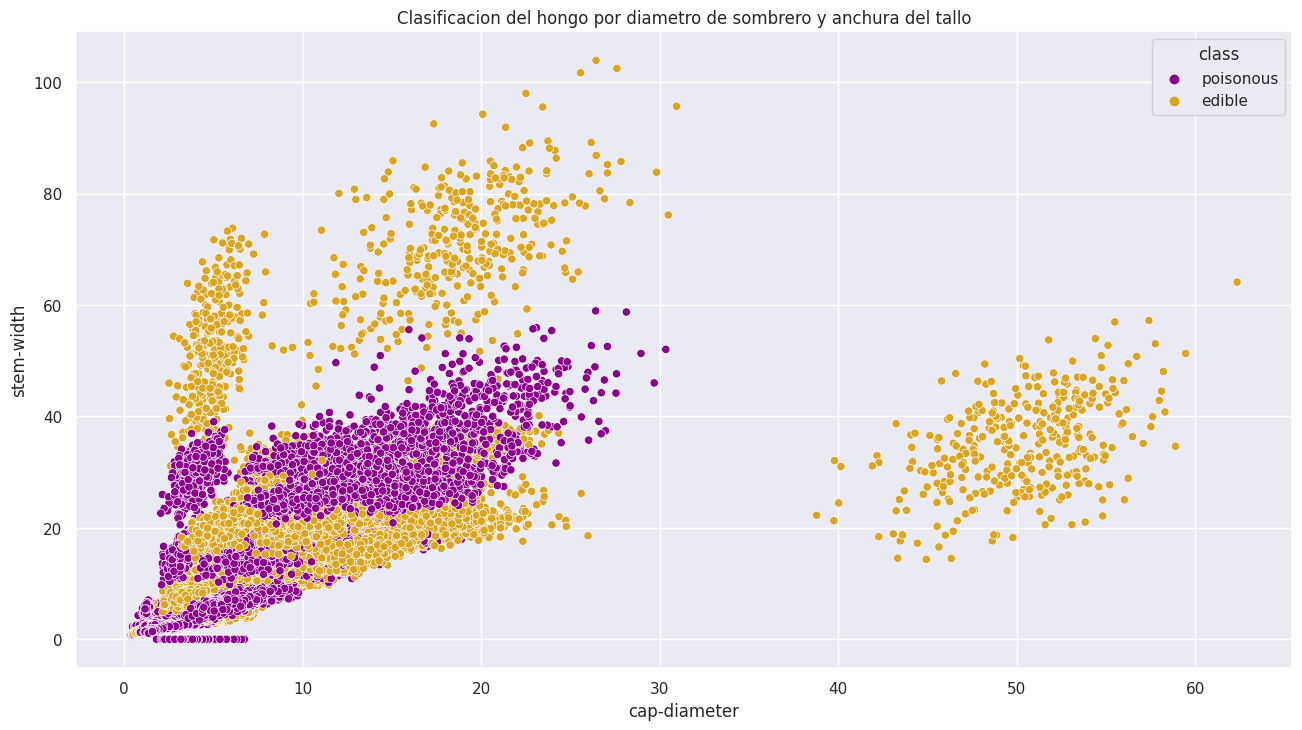

In [30]:
sns.scatterplot(data=data_frame , x="cap-diameter", y="stem-width", hue = "class",  palette = {'edible':'GoldenRod', 'poisonous': 'DarkMagenta'} )
plt.title("Clasificacion del hongo por diametro de sombrero y anchura del tallo")

In [31]:
group_by_season = data_frame.groupby(["season","cap-color","class"]).agg({'class':['count']})

In [32]:
group_by_season = group_by_season.unstack()
group_by_season = group_by_season.reset_index()
group_by_season.columns = ["season","cap-color","edibles","poisonous"]

In [33]:
group_by_season = group_by_season.fillna(0)

In [34]:
group_by_season["prob_poisonous"] = group_by_season["poisonous"]*100 / (group_by_season.edibles + group_by_season.poisonous)

In [35]:
matrix = group_by_season.pivot_table(values = 'prob_poisonous', index = "season", columns="cap-color").fillna(0)

Text(162.5, 0.5, 'season')

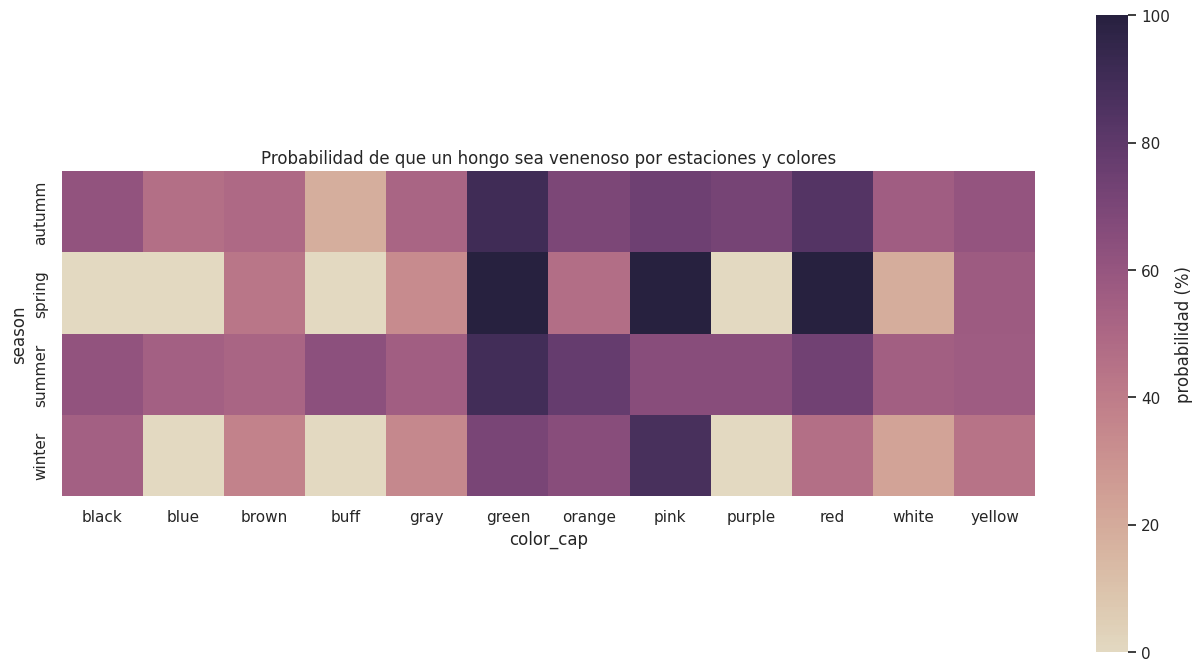

In [36]:
cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
ax = sns.heatmap(matrix,square=True,cmap=cmap, cbar_kws = {'label': 'probabilidad (%)'}) 
### Labels ###
plt.title("Probabilidad de que un hongo sea venenoso por estaciones y colores")
plt.xlabel('color_cap', fontsize = 12)
plt.ylabel('season', fontsize = 12) 

In [37]:
grouped_by_bleeding = data_frame.groupby(["does-bruise-or-bleed", "season" ,"class"]).agg({"class":["count"]})

In [38]:
grouped_by_bleeding = grouped_by_bleeding.unstack()
grouped_by_bleeding = grouped_by_bleeding.reset_index()
grouped_by_bleeding.columns = ['does-bruise-or-bleed', 'season', '#edible', '#poisonous']
grouped_by_bleeding = grouped_by_bleeding.fillna(0)

In [39]:
grouped_by_bleeding["prob_poisonous"] = grouped_by_bleeding['#poisonous']*100 / (grouped_by_bleeding['#edible'] + grouped_by_bleeding['#poisonous'])

In [40]:
matrix = grouped_by_bleeding.pivot_table(values = 'prob_poisonous', index = "does-bruise-or-bleed", columns="season").fillna(0)

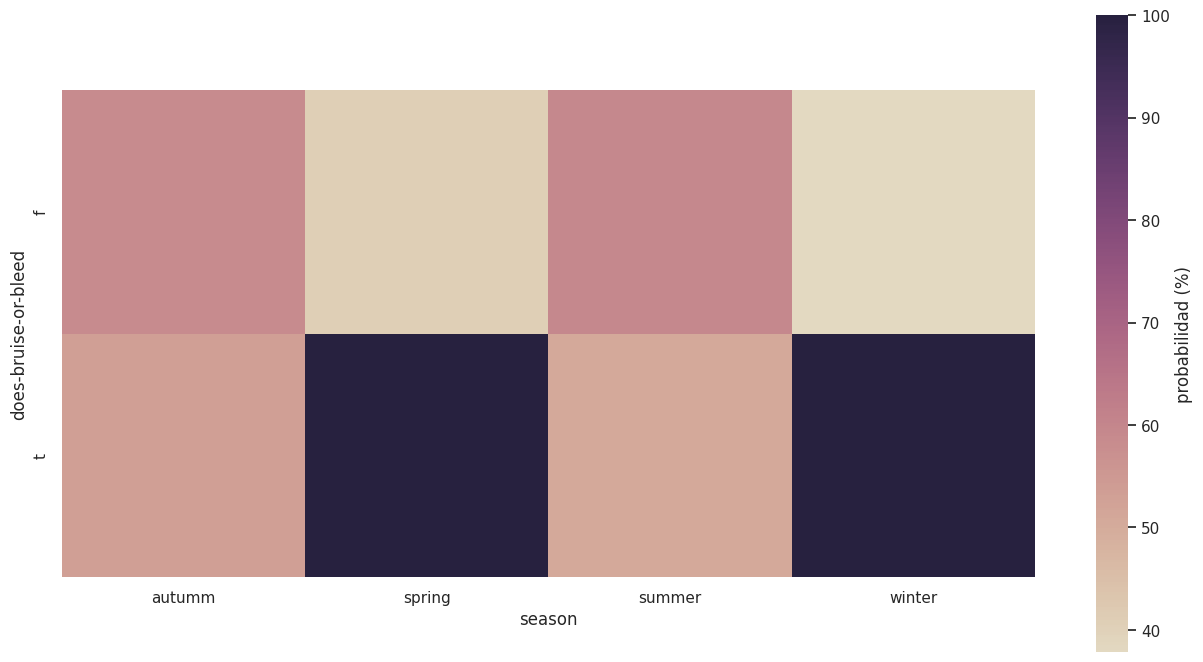

In [41]:
cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
ax = sns.heatmap(matrix,square=True,cmap=cmap, cbar_kws = {'label': 'probabilidad (%)'}) 
### Labels ###

Text(0.5, 1.0, 'Clasificacion del hongo por altura y anchura del tallo')

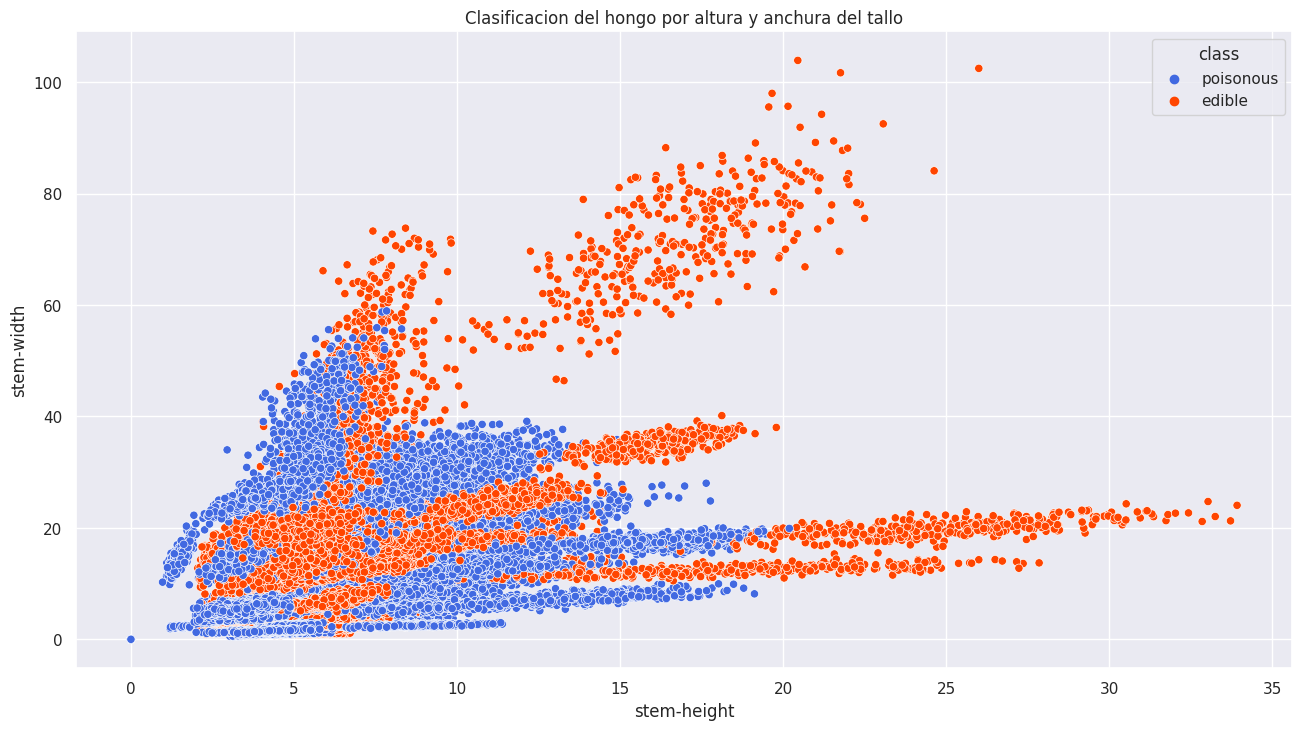

In [42]:
sns.scatterplot(data=data_frame , x="stem-height", y="stem-width", hue = "class",  palette = {'edible':'OrangeRed', 'poisonous': 'RoyalBlue'} )
plt.title("Clasificacion del hongo por altura y anchura del tallo")